## Group

* Look at what other groups are doing, try the same/similar things
* (A) How the number (or hexbin) of unmasked or density changed along x-y, y-z, x-z?
* (A) Apply box plot to density?
* Use statistics to test differences between z layers?

In [2]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import urllib2
import scipy.stats as stats

np.set_printoptions(precision=3, suppress=True)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:] # don't want first row (labels)

# chopping data based on thresholds on x and y coordinates
x_bounds = (409, 3529)
y_bounds = (1564, 3124)

def check_in_bounds(row, x_bounds, y_bounds):
    if row[0] < x_bounds[0] or row[0] > x_bounds[1]:
        return False
    if row[1] < y_bounds[0] or row[1] > y_bounds[1]:
        return False
    if row[3] == 0:
        return False
    
    return True

indices_in_bound, = np.where(np.apply_along_axis(check_in_bounds, 1, csv, x_bounds, y_bounds))
data_thresholded = csv[indices_in_bound]
n = data_thresholded.shape[0]


def synapses_over_unmasked(row):
    s = (row[4]/row[3])*(64**3)
    return [row[0], row[1], row[2], s]

syn_unmasked = np.apply_along_axis(synapses_over_unmasked, 1, data_thresholded)
syn_normalized = syn_unmasked
print 'end setup'

end setup


## boxplot of density

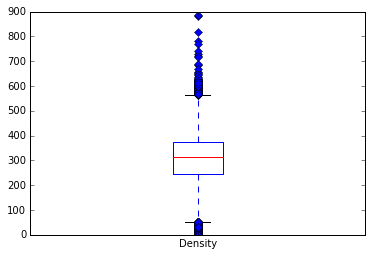

In [6]:
# syn_unmasked_T = syn_unmasked.values.T.tolist()
# columns = [syn_unmasked[i] for i in [4]]

'''fig = plt.figure()
ax = fig.plot(111)'''
plt.boxplot(syn_unmasked[:,3], 0, 'gD')
plt.xticks([1], ['Density'])
plt.show()
